In [20]:
import pandas as pd
data=pd.read_csv("train.csv")

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

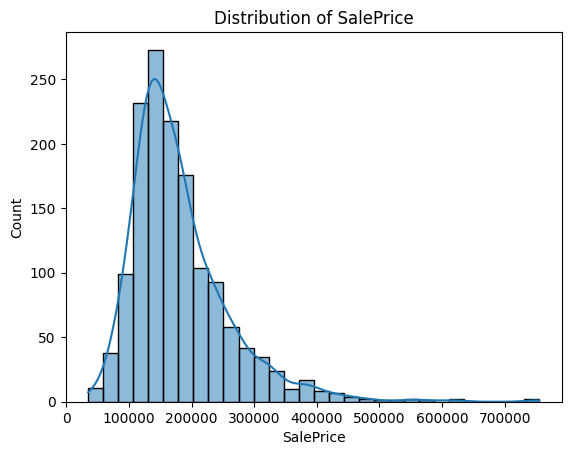

In [25]:
# Visualize the distribution of the target variable (SalePrice)
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.show()


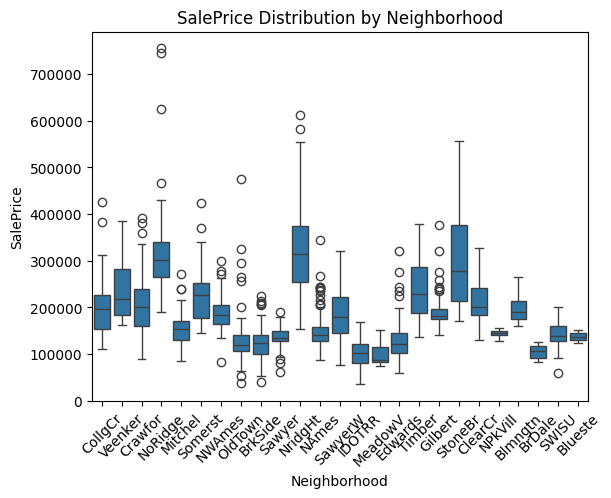

In [26]:
# Visualize distribution of SalePrice based on a categorical variable
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=45)
plt.title('SalePrice Distribution by Neighborhood')
plt.show()


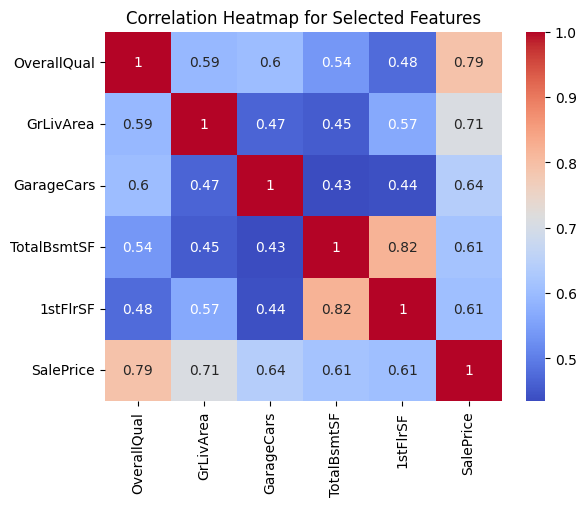

In [27]:
# Visualize correlation heatmap for selected features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Features')
plt.show()


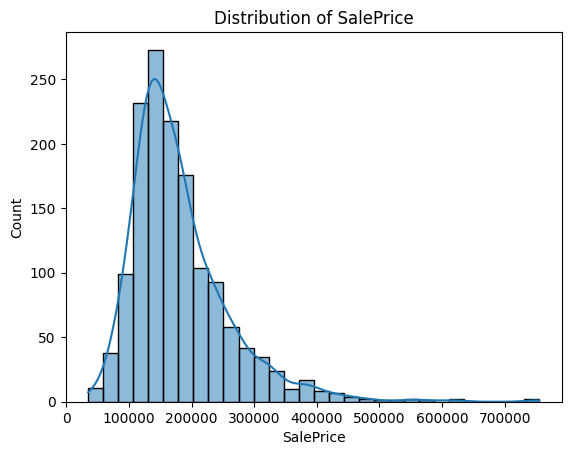

In [28]:
# Visualize the distribution of SalePrice
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.show()


In [29]:
# Remove specified columns
columns_to_remove = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
data = data.drop(columns=columns_to_remove)


In [30]:
# Fill missing values for numerical columns with mean
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [31]:
# Fill missing values for categorical columns with mode
categorical_columns = data.select_dtypes(include='object').columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [32]:
# Handle categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)



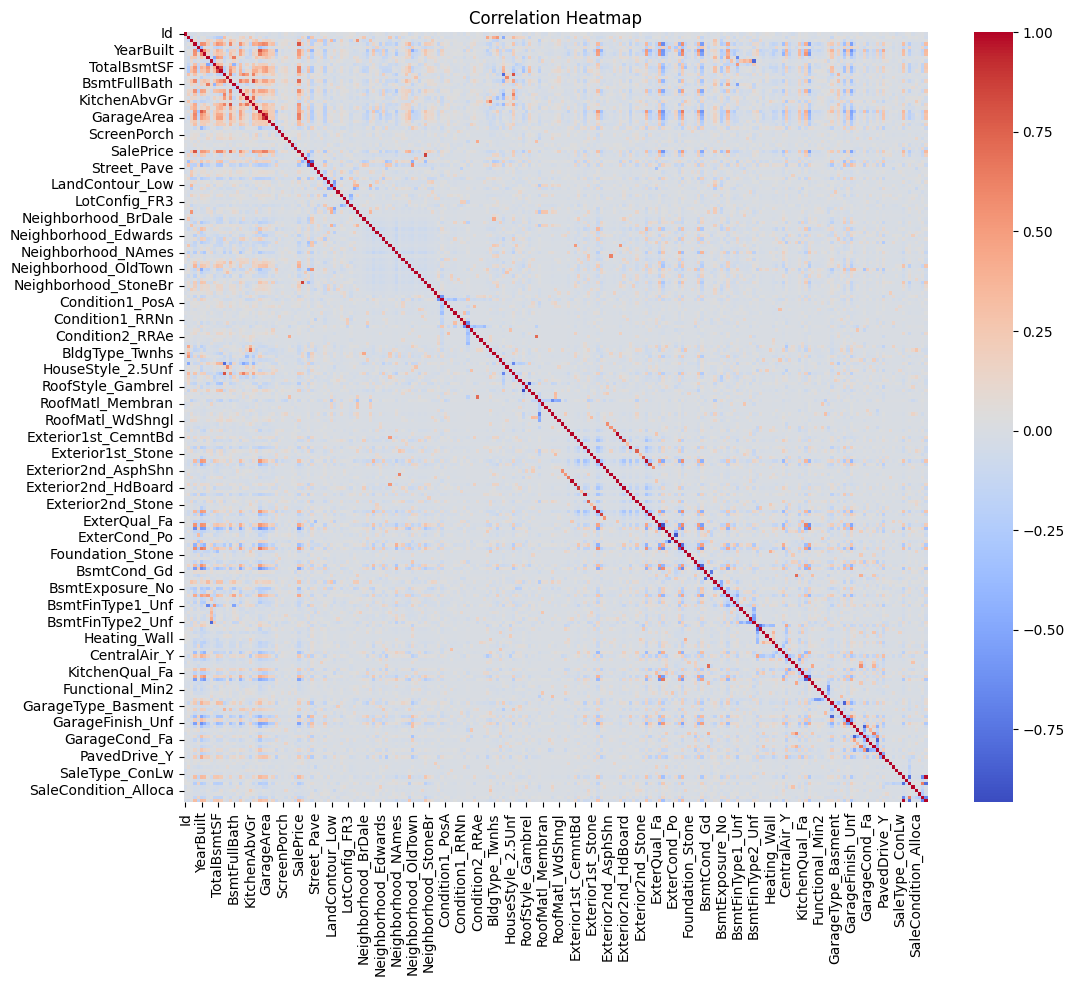

In [33]:
# Correlation heatmap to identify feature relationships
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [34]:
# Split the data into features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']



In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()


In [41]:
# List of models
models = [linear_model, random_forest_model, gradient_boosting_model, svr_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector']


In [42]:
# Define evaluation metrics
metrics = {
    'MAE': mean_absolute_error,
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)),
    'MAPE': lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / y_true)) * 100
}


In [43]:
# Training and evaluation loop
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f'\nMetrics for {model_name}:')
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f'{metric_name}: {metric_value:.4f}')


Metrics for Linear Regression:
MAE: 20424.4996
MSE: 2664008986.8477
RMSE: 51614.0387
MAPE: 12.1069

Metrics for Random Forest:
MAE: 17798.3270
MSE: 842636815.2384
RMSE: 29028.2072
MAPE: 10.8326

Metrics for Gradient Boosting:
MAE: 17624.4883
MSE: 873303416.6874
RMSE: 29551.7075
MAPE: 10.2871

Metrics for Support Vector:
MAE: 59556.7877
MSE: 7859371053.7968
RMSE: 88653.0939
MAPE: 35.9659
